In [1]:
import numpy as np
import pandas as pd

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [3]:
df_train = pd.read_csv('Train_Dataset.csv')
df_test= pd.read_csv('Test_Dataset.csv')

In [2]:
def drop_columns(df,columns):
    df.drop(columns,axis=1,inplace=True,errors='ignore')

In [4]:
def drop_duplicates(df):
    df_train.drop_duplicates(inplace=True)

In [5]:
df_baseline_train = df_train.copy()
df_baseline_test = df_test.copy()

In [6]:
drop_features =['customer_id','Unnamed: 19','Unnamed: 20']
drop_columns(df_train,drop_features)
drop_columns(df_test,drop_features)

In [7]:
# df_train.duplicated().sum(),df_test.duplicated().sum()

(4, 0)

In [8]:
drop_duplicates(df_train)
# df_train.duplicated().sum()

0

In [9]:
df_train.dropna(inplace=True,subset=['Churn'])
# df_train.isnull().sum()

account_length            2
location_code             0
intertiol_plan            3
voice_mail_plan           6
number_vm_messages        3
total_day_min             1
total_day_calls           3
total_day_charge          5
total_eve_min             3
total_eve_calls           4
total_eve_charge          8
total_night_minutes       2
total_night_calls         5
total_night_charge        5
total_intl_minutes        2
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     0
dtype: int64

In [10]:
def mark_minus_invalids_as_nan(df,columns):
    for col in columns:
        # df[df[col]<0][col]=np.nan
        df.loc[df[col]<0,col]=np.nan

In [12]:
def find_minus(df,columns):
    for col in columns:
        print(col," = ",df[df[col]<0].shape[0])

In [11]:
categorical = ['intertiol_plan', 'voice_mail_plan', 'Churn', 'location_code']
numerical =['account_length',
            'number_vm_messages',
            'total_day_min',
            'total_day_calls',
            'total_day_charge',
            'total_eve_min',
            'total_eve_calls',
            'total_eve_charge',
            'total_night_minutes',
            'total_night_calls',
            'total_night_charge',
            'total_intl_minutes',
            'total_intl_calls',
            'total_intl_charge',
            'customer_service_calls']

In [13]:
find_minus(df_train,columns=numerical)

account_length  =  0
number_vm_messages  =  1
total_day_min  =  4
total_day_calls  =  1
total_day_charge  =  2
total_eve_min  =  1
total_eve_calls  =  2
total_eve_charge  =  0
total_night_minutes  =  0
total_night_calls  =  0
total_night_charge  =  0
total_intl_minutes  =  3
total_intl_calls  =  0
total_intl_charge  =  0
customer_service_calls  =  0


In [28]:
mark_minus_invalids_as_nan(df_train,numerical)
df_train.isnull().sum()

account_length            2
location_code             0
intertiol_plan            3
voice_mail_plan           6
number_vm_messages        4
total_day_min             5
total_day_calls           4
total_day_charge          7
total_eve_min             4
total_eve_calls           6
total_eve_charge          8
total_night_minutes       2
total_night_calls         5
total_night_charge        5
total_intl_minutes        5
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     0
dtype: int64

In [17]:
df_train.describe()

,account_length,location_code,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,2310.000000,2312.000000,2308.000000,2307.000000,2308.000000,2305.000000,2308.000000,2306.000000,2304.000000,2310.000000,2307.000000,2307.000000,2307.000000,2309.000000,2307.000000,2311.000000
mean,101.327706,473.525519,7.677643,183.240442,105.405113,30.997748,203.729593,100.247615,17.129679,209.506234,87.628088,9.435063,10.272909,4.441317,2.773658,1.651233
std,39.940975,42.039577,13.589342,72.313433,221.564188,9.750026,115.568962,19.842609,4.325082,408.843713,12.744009,18.691696,2.715550,2.461955,0.733441,1.429572
min,1.000000,445.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,445.000000,0.000000,144.200000,87.000000,24.500000,166.150000,87.000000,14.180000,167.325000,79.000000,7.530000,8.600000,3.000000,2.320000,1.000000
50%,101.000000,452.000000,0.000000,180.500000,102.000000,30.600000,202.550000,101.000000,17.220000,201.050000,90.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,452.000000,14.250000,221.000000,115.000000,37.590000,236.425000,114.000000,20.090000,234.975000,98.000000,10.580000,12.000000,6.000000,3.240000,2.000000
max,232.000000,547.000000,51.000000,2283.900000,10700.000000,60.960000,5186.400000,170.000000,30.830000,19700.000000,105.000000,900.150000,18.300000,20.000000,4.940000,9.000000


In [29]:
suggested_bounds = {'account_length': [0, 250],
          'number_vm_messages': [0, 51],
          'total_day_min': [0, 500],
          'total_day_calls': [0, 800],
          'total_day_charge': [0, 61],
          'total_eve_min': [0, 800],
          'total_eve_calls': [0, 170],
          'total_eve_charge': [0, 31],
          'total_night_minutes': [0,800],
          'total_night_calls': [0, 175],
          'total_night_charge': [0, 200],
          'total_intl_minutes': [0, 25],
          'total_intl_calls': [0, 20],
          'total_intl_charge': [0, 10],
          'customer_service_calls': [0,10]}

In [19]:
df_test.describe()

,account_length,location_code,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,1500.000000,1498.000000,1499.000000,1497.000000,1497.000000,1496.000000,1498.000000,1500.00000,1491.000000,1497.000000,1498.000000,1498.000000,1498.000000,1497.000000,1500.000000,1499.000000
mean,101.042000,475.508678,7.805871,184.498798,100.085504,31.314693,203.982443,100.03400,17.321415,201.957448,119.414553,9.093071,10.326101,4.409486,2.789387,1.638426
std,39.454167,43.035587,13.376356,56.977595,20.531492,10.014655,51.534663,19.99495,4.366784,50.607989,10.920603,2.223011,2.917300,2.538735,0.787599,1.385127
min,1.000000,445.000000,0.000000,2.600000,-85.000000,-46.480000,42.500000,44.00000,3.610000,-207.400000,105.000000,1.970000,0.000000,-5.000000,0.000000,0.000000
25%,73.000000,452.000000,0.000000,144.600000,87.000000,24.642500,168.325000,87.00000,14.270000,168.400000,111.000000,7.580000,8.400000,3.000000,2.270000,1.000000
50%,100.000000,452.000000,0.000000,184.100000,100.000000,31.300000,203.850000,100.00000,17.330000,203.500000,117.000000,9.140000,10.300000,4.000000,2.795000,1.000000
75%,127.250000,547.000000,18.000000,222.100000,113.000000,37.857500,238.175000,113.00000,20.210000,236.200000,125.000000,10.647500,12.300000,6.000000,3.320000,2.000000
max,243.000000,547.000000,50.000000,345.300000,157.000000,59.360000,363.700000,168.00000,30.910000,381.900000,175.000000,17.190000,20.000000,18.000000,5.400000,9.000000


In [20]:
# import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
def check_outliers_by_visualisation(df,features):
    x=len(features)
    fig, axs = plt.subplots(x, 2, figsize=(10, 4*x))
    for i,f in enumerate(features):
        # print(i,f)
        sns.distplot(df[f],rug=True,ax=axs[i][0])
        sns.boxplot(x =f, data = df,ax=axs[i][1])
    plt.show()

c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no l

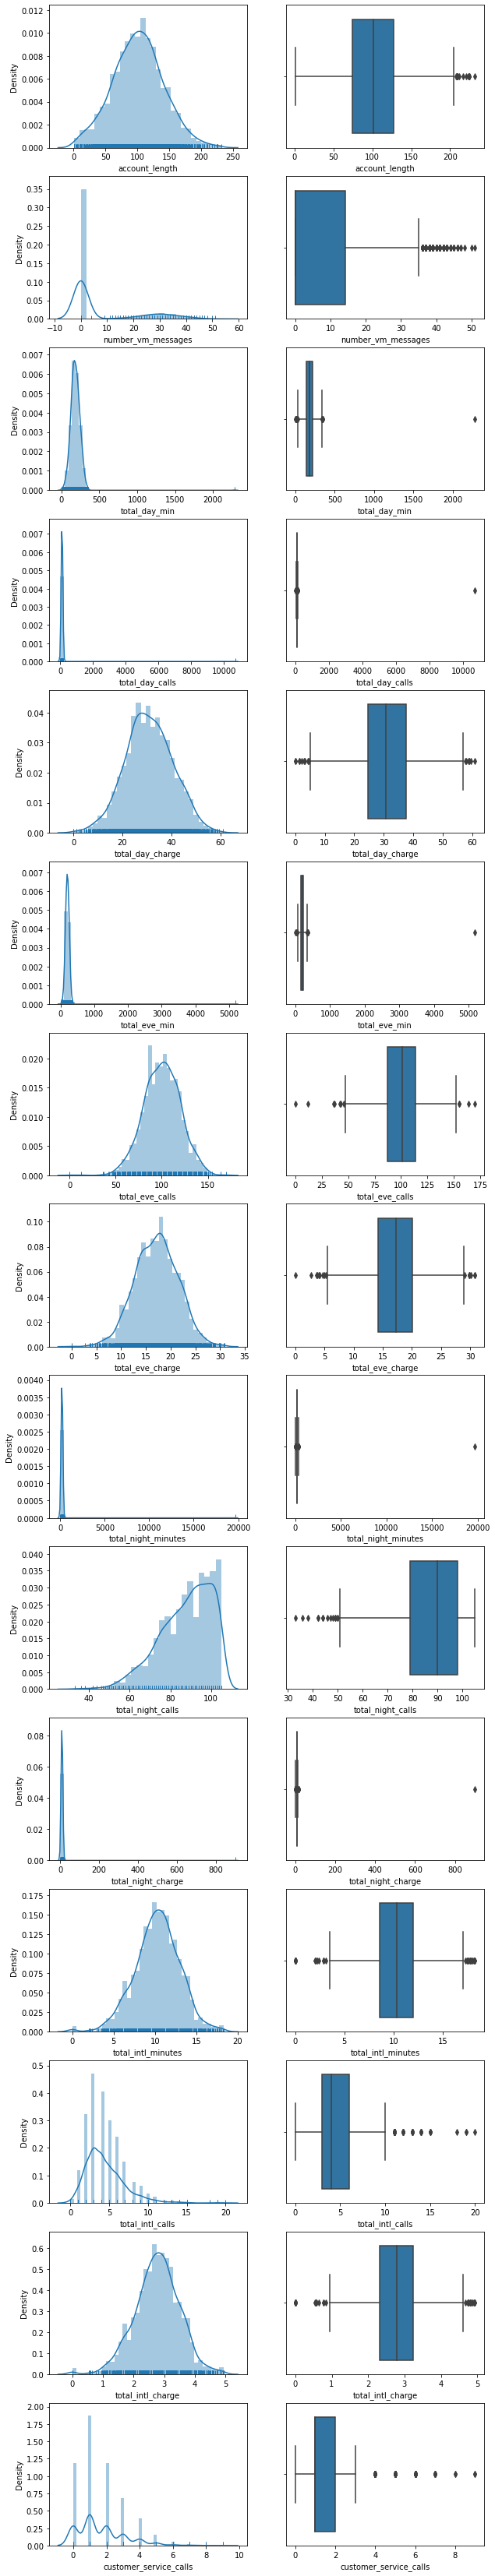

In [24]:
# check_outliers_by_visualisation(df_train,numerical)

c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no l

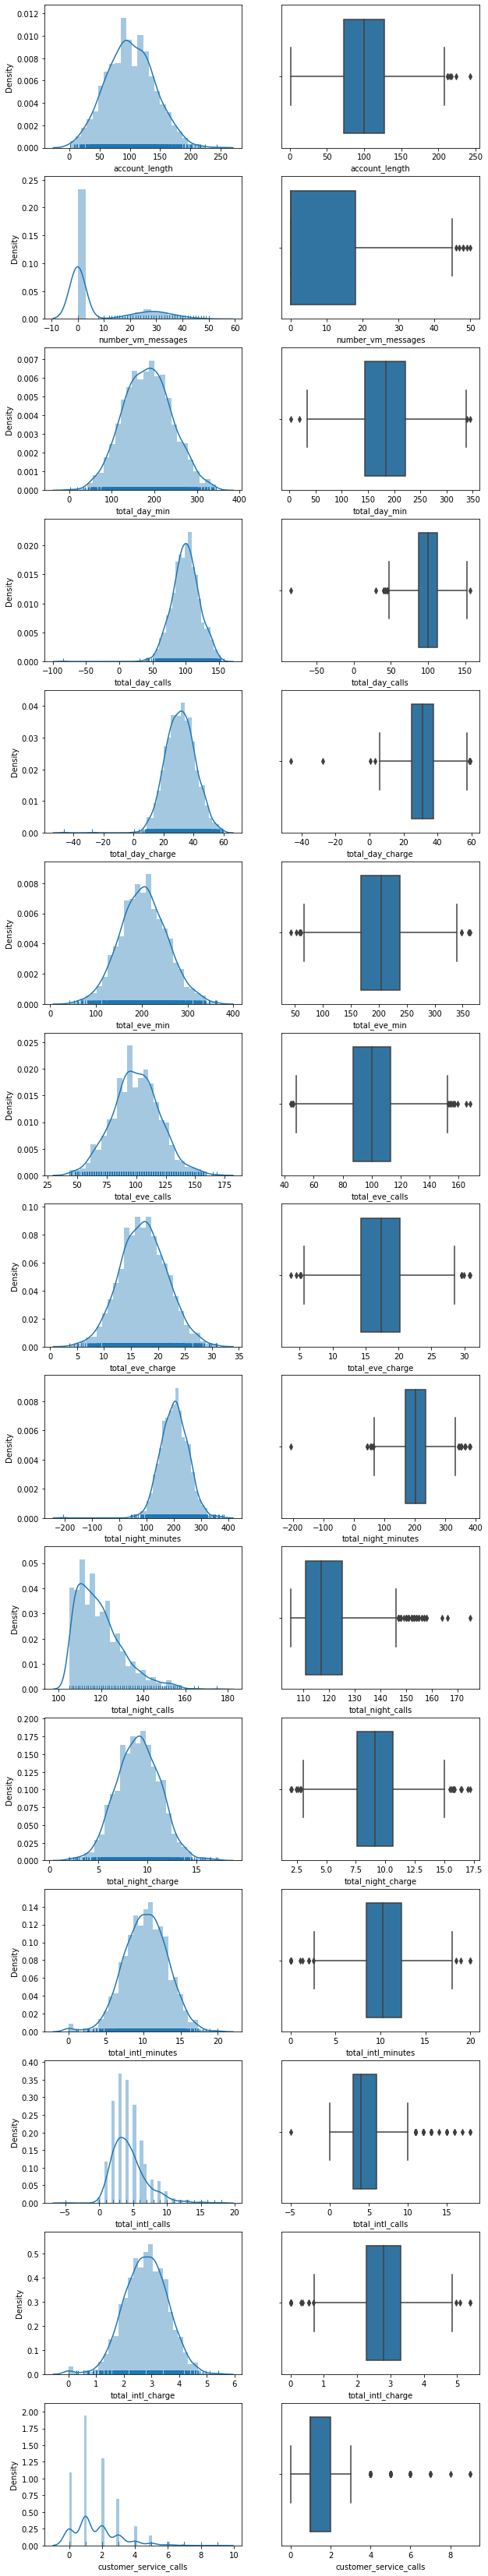

In [23]:
# check_outliers_by_visualisation(df_test,numerical)

<AxesSubplot:>

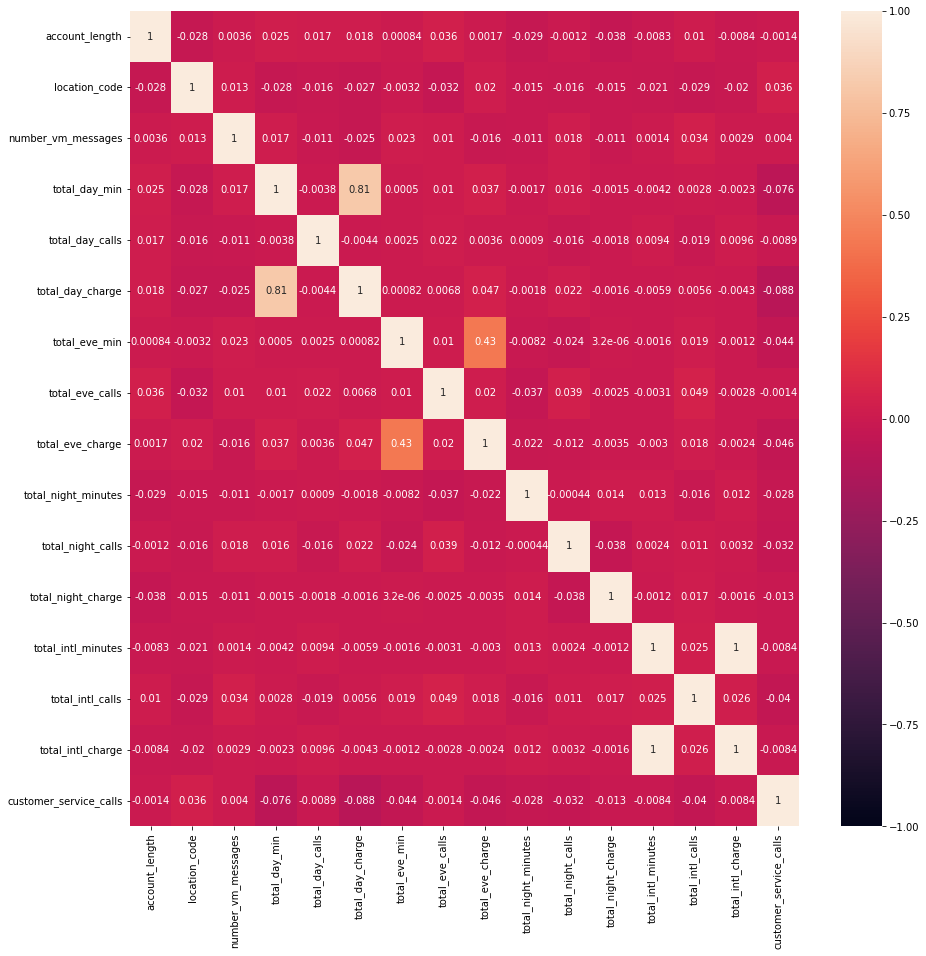

In [26]:
corr_train = df_train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_train, vmin=-1, vmax=1, annot=True)

In [34]:
# corr_test = df_train.corr()
# plt.figure(figsize=(15,15))
# sns.heatmap(corr_test, vmin=-1, vmax=1, annot=True)

In [30]:
def set_nan(df,bounds):
    data = df.copy()
    for key in bounds.keys():
        # print("values",bounds[key])
        data.loc[data[key] < bounds[key][0] , key] = np.nan
        data.loc[data[key] > bounds[key][1] , key] = np.nan
    return data

In [31]:
df_train = set_nan(df_train,suggested_bounds)
df_train.isnull().sum()

account_length            2
location_code             0
intertiol_plan            3
voice_mail_plan           6
number_vm_messages        4
total_day_min             6
total_day_calls           5
total_day_charge          7
total_eve_min             5
total_eve_calls           6
total_eve_charge          8
total_night_minutes       3
total_night_calls         5
total_night_charge        6
total_intl_minutes        5
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     0
dtype: int64

In [ ]:
#previous=====================================================
# account_length,2
# location_code,0
# intertiol_plan,3
# voice_mail_plan,6
# number_vm_messages,4
# total_day_min,5
# total_day_calls,4
# total_day_charge,7
# total_eve_min,4
# total_eve_calls,6
# total_eve_charge,8
# total_night_minutes,2
# total_night_calls,5
# total_night_charge,5
# total_intl_minutes,5
# total_intl_calls,3
# total_intl_charge,5
# customer_service_calls,1
# Churn,0

# account_length,2
# location_code,0
# intertiol_plan,3
# voice_mail_plan,6
# number_vm_messages,4
# total_day_min,6
# total_day_calls,5
# total_day_charge,7
# total_eve_min,5
# total_eve_calls,6
# total_eve_charge,8
# total_night_minutes,3
# total_night_calls,5
# total_night_charge,6
# total_intl_minutes,5
# total_intl_calls,3
# total_intl_charge,5
# customer_service_calls,1
# Churn,0


In [32]:
df_test = set_nan(df_test,suggested_bounds)
# df_train.isnull().sum()

<AxesSubplot:>

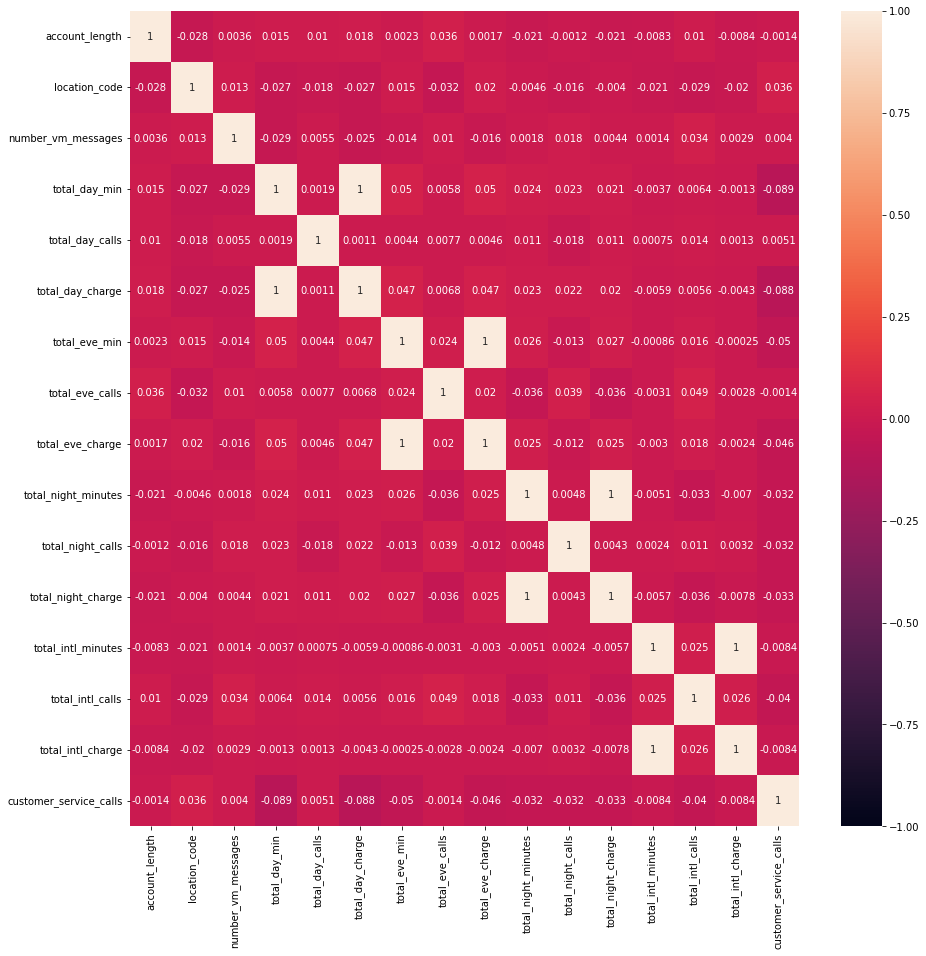

In [35]:
corr_train_2 = df_train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_train_2, vmin=-1, vmax=1, annot=True)

<AxesSubplot:>

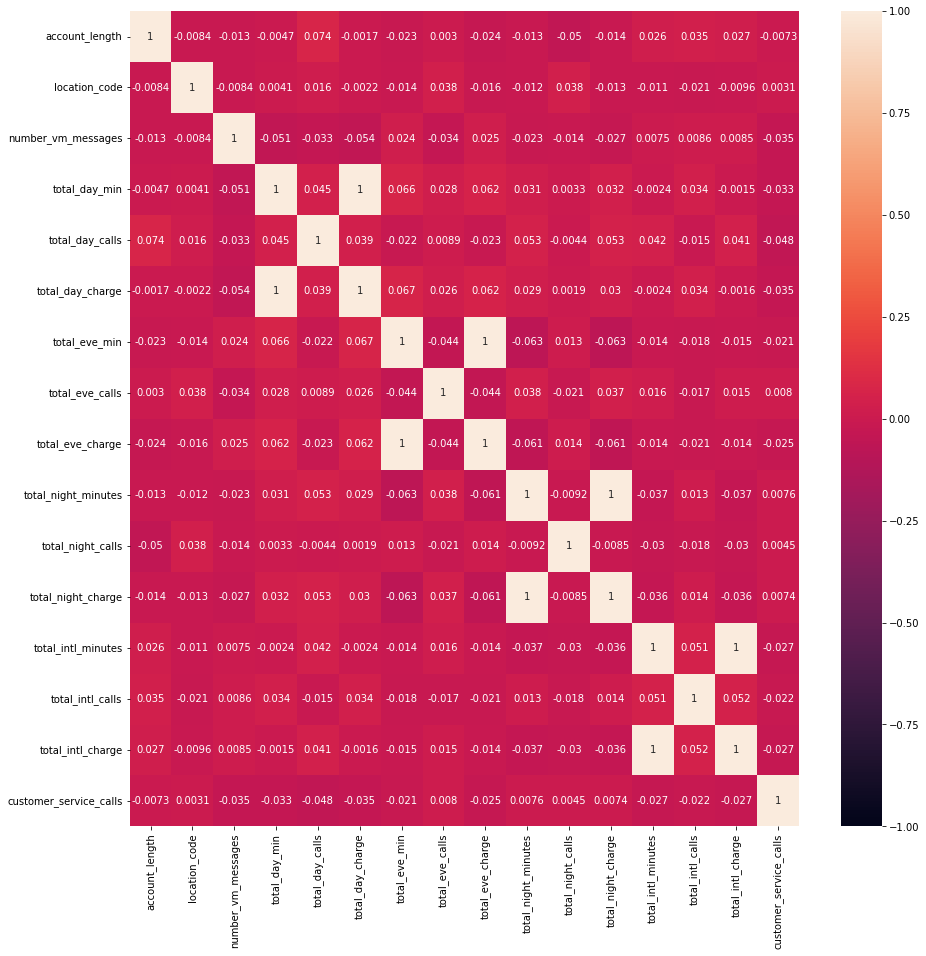

In [36]:
corr_test_2 = df_test.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_test_2, vmin=-1, vmax=1, annot=True)

In [37]:
# numerical

['account_length',
 'number_vm_messages',
 'total_day_min',
 'total_day_calls',
 'total_day_charge',
 'total_eve_min',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'customer_service_calls']

In [38]:
correlated_sets =[['total_day_charge','total_day_min'],
                  ['total_eve_charge','total_eve_min'],
                  ['total_night_charge','total_night_minutes'],
                  ['total_intl_charge', 'total_intl_minutes']]

In [ ]:
# [['total_day_charge','total_day_min']]

In [ ]:
83.6
236.9
266.7
231.2
150.6

In [42]:
df_train[df_train['total_day_charge'].isnull()][['total_day_charge','total_day_min']]

,total_day_charge,total_day_min
298,NaN,83.6
525,NaN,236.9
1118,NaN,NaN
1132,NaN,NaN
1767,NaN,266.7
1887,NaN,231.2
2200,NaN,150.6


In [43]:
df_train[df_train['total_day_min'].isnull()][['total_day_charge','total_day_min']]

,total_day_charge,total_day_min
851,48.26,NaN
1118,NaN,NaN
1132,NaN,NaN
1328,29.09,NaN
1882,38.88,NaN
2090,23.02,NaN


In [ ]:
# [['total_eve_charge','total_eve_min']]

In [44]:
df_train[df_train['total_eve_charge'].isnull()][  ['total_eve_charge','total_eve_min']]

,total_eve_charge,total_eve_min
11,NaN,203.8
298,NaN,203.9
654,NaN,250.2
1118,NaN,170.0
1379,NaN,273.0
1447,NaN,287.3
1882,NaN,168.7
2090,NaN,205.9


In [45]:
df_train[df_train['total_eve_min'].isnull()][  ['total_eve_charge','total_eve_min']]

,total_eve_charge,total_eve_min
312,8.78,NaN
380,15.84,NaN
492,17.82,NaN
790,10.69,NaN
1109,22.18,NaN


In [ ]:
#['total_night_charge','total_night_minutes'],

In [46]:
df_train[df_train['total_night_charge'].isnull()][  ['total_night_charge','total_night_minutes']]

,total_night_charge,total_night_minutes
129,NaN,203.3
180,NaN,224.6
579,NaN,70.6
618,NaN,169.4
654,NaN,144.9
678,NaN,189.4


In [47]:
df_train[df_train['total_night_minutes'].isnull()][  ['total_night_charge','total_night_minutes']]

,total_night_charge,total_night_minutes
324,9.37,NaN
647,5.36,NaN
1009,8.87,NaN


In [48]:
# ['total_intl_charge', 'total_intl_minutes']

In [50]:
df_train[df_train['total_intl_charge'].isnull()][['total_intl_charge', 'total_intl_minutes']]

,total_intl_charge,total_intl_minutes
339,NaN,11.8
1131,NaN,10.5
1886,NaN,9.6
2004,NaN,12.4
2072,NaN,7.4


In [49]:
df_train[df_train['total_intl_minutes'].isnull()][['total_intl_charge', 'total_intl_minutes']]

,total_intl_charge,total_intl_minutes
195,2.51,NaN
298,2.19,NaN
789,3.78,NaN
900,2.21,NaN
1128,2.03,NaN


In [78]:
def mice_imputation(df,sets):
    for s in sets:
        lr = LinearRegression()
        imp = IterativeImputer(estimator=lr, verbose=2, max_iter=30, tol=1e-10, imputation_order='roman',random_state=0)
        return pd.DataFrame(imp.fit_transform(df[s]),columns=s)


In [79]:
df_train_2 =df_train.copy()
df_train_2=mice_imputation(df_train_2,[['total_day_charge','total_day_min']])

[IterativeImputer] Completing matrix with shape (2312, 2)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.00
[IterativeImputer] Change: 101.60298175986293, scaled tolerance: 3.508e-08 
[IterativeImputer] Ending imputation round 2/30, elapsed time 0.00
[IterativeImputer] Change: 0.006789301436633366, scaled tolerance: 3.508e-08 
[IterativeImputer] Ending imputation round 3/30, elapsed time 0.01
[IterativeImputer] Change: 4.7000597191981797e-08, scaled tolerance: 3.508e-08 
[IterativeImputer] Ending imputation round 4/30, elapsed time 0.01
[IterativeImputer] Change: 3.694822225952521e-13, scaled tolerance: 3.508e-08 
[IterativeImputer] Early stopping criterion reached.


In [81]:
df_train_2.isnull().sum()

total_day_charge    0
total_day_min       0
dtype: int64

In [88]:
df_train_2[:][298]

KeyError: 298

In [92]:
df_train[df_train['total_day_charge'].isnull()][['total_day_charge','total_day_min']]

,total_day_charge,total_day_min
298,NaN,83.6
525,NaN,236.9
1118,NaN,NaN
1132,NaN,NaN
1767,NaN,266.7
1887,NaN,231.2
2200,NaN,150.6


In [96]:
df_train[['total_day_charge','total_day_min']].iloc[[298,525,1118,1132,1767,1887,2200]]

,total_day_charge,total_day_min
298,NaN,83.6
526,22.56,132.7
1123,39.39,231.7
1137,28.15,165.6
1773,38.76,228.1
1893,24.38,143.4
2207,33.52,197.2


In [97]:
df_train_2.iloc[[298,524,525,1118,1132,1767]]

,total_day_charge,total_day_min
298,14.328895,83.6
526,30.280000,178.1
1123,41.680000,252.2
1118,39.390000,231.7
1132,28.150000,165.6
1767,38.760000,228.1


In [ ]:
298,,83.6
525,,236.9
1118,,
1132,,
1767,,266.7
1887,,231.2
2200,,150.6


In [ ]:
corr_test_2 = df_test.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_test_2, vmin=-1, vmax=1, annot=True)

In [105]:
 # ['total_eve_charge','total_eve_min'],
df_train_3 =df_train.copy()
df_train_3=mice_imputation(df_train_3,[['total_eve_charge','total_eve_min']])

[IterativeImputer] Completing matrix with shape (2312, 2)
[IterativeImputer] Ending imputation round 1/30, elapsed time 0.01
[IterativeImputer] Change: 98.09794530925681, scaled tolerance: 3.585e-08 
[IterativeImputer] Ending imputation round 2/30, elapsed time 0.02
[IterativeImputer] Change: 0.004661421535796961, scaled tolerance: 3.585e-08 
[IterativeImputer] Ending imputation round 3/30, elapsed time 0.02
[IterativeImputer] Change: 3.2475579558877143e-08, scaled tolerance: 3.585e-08 
[IterativeImputer] Early stopping criterion reached.


In [125]:
df_train[  ['total_eve_charge','total_eve_min']]

,total_eve_charge,total_eve_min
0,18.36,216.0
1,14.89,175.2
2,22.87,269.1
3,17.78,209.2
4,7.94,93.4
...,...,...
2316,19.47,229.0
2317,10.09,118.7
2318,22.77,270.1
2319,14.00,164.5


In [107]:
df_train_3

,total_eve_charge,total_eve_min
0,18.36,216.0
1,14.89,175.2
2,22.87,269.1
3,17.78,209.2
4,7.94,93.4
...,...,...
2307,19.47,229.0
2308,10.09,118.7
2309,22.77,270.1
2310,14.00,164.5


In [220]:
def isNaN(num):
    if float('-inf') < float(num) < float('inf'):
        return False
    else:
        return True


In [261]:
def regression_imputation(df,sets):
    for s in sets:
        print(s)
        df.loc[df[s[0]].isnull() & df_train[s[1]].isnull(),s[0]]=df[s[0]].median()
        df.loc[df[s[0]].isnull() & df_train[s[1]].isnull(),s[1]]=df[s[1]].median()

        lr_0 = LinearRegression()
        lr_1 = LinearRegression()
        valid =df.dropna(subset=s)
        # train_set_0 =df.dropna(subset=[s[0]])[s]
        # train_set_1 =df.dropna(subset=[s[1]])[s]
        # return valid

        a=valid[[s[0]]]
        b=valid[[s[1]]]
        # print(a)
        lr_0.fit(a,b)
        lr_1.fit(b,a)
        #
        #
        #
        for i in df.index:
            if isNaN(df[s[0]][i]) :

                v=np.array([[df[s[1]][i]]])
                df[s[0]][i]=lr_1.predict(v)[0][0]
            elif  isNaN(df[s[1]][i]):
                v=np.array([[df[s[0]][i]]])
                df[s[1]][i]=lr_0.predict(v)[0][0]


    return df
        # df.loc[df[s[1]].isnull(),s[1]] = lr_0.predict(df[[s[0]]])[df[s[1]].isnull()]
        # df.loc[df[s[0]].isnull(),s[0]] = lr_1.predict(df[[s[1]]])[df[s[0]].isnull()]


In [111]:
x=['total_day_charge','total_day_min']
df_train.loc[df_train[x[0]].isnull() & df_train[x[1]].isnull(),'total_day_charge']

1118   NaN
1132   NaN
Name: total_day_charge, dtype: float64

In [109]:
x=['total_intl_charge', 'total_intl_minutes']
df_train.loc[df_train[x[0]].isnull() & df_train[x[1]].isnull()]

,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn


In [122]:
df_train_4 = df_train.copy()
df_train_4=regression_imputation(df_train_4,[['total_day_charge','total_day_min']])

['total_day_charge', 'total_day_min']


In [123]:
x=['total_day_charge','total_day_min']
df_train_4.loc[df_train_4[x[0]].isnull() & df_train_4[x[1]].isnull(),'total_day_charge']

Series([], Name: total_day_charge, dtype: float64)

In [140]:
x=['total_day_charge','total_day_min']
df_train[~df_train[x[0]].isnull() & ~df_train[x[1]].isnull()].isnull().sum()

account_length            2
location_code             0
intertiol_plan            2
voice_mail_plan           4
number_vm_messages        4
total_day_min             0
total_day_calls           4
total_day_charge          0
total_eve_min             5
total_eve_calls           5
total_eve_charge          4
total_night_minutes       3
total_night_calls         3
total_night_charge        6
total_intl_minutes        4
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     0
dtype: int64

In [ ]:
regression_imputation(df_train_4,[['total_day_charge','total_day_min']])

In [206]:
df_train_4 = df_train.copy()
x=df_train_4.dropna(subset=['total_day_charge'])[['total_day_charge','total_day_min']]

In [165]:
x

,total_day_charge,total_day_min
0,20.59,121.1
1,44.08,259.3
2,31.18,183.4
3,11.68,68.7
4,47.31,278.3
...,...,...
2316,30.60,180.0
2317,26.20,154.1
2318,34.62,188.9
2319,32.35,191.2


In [153]:
df_train_4.shape,df_train.shape,x.shape

((2312, 19), (2312, 19), (2305, 19))

In [157]:
len(df_train)

2312

In [262]:
df_train_4 = df_train.copy()
correlated_sets =[['total_day_charge','total_day_min'],
                  ['total_eve_charge','total_eve_min'],
                  ['total_night_charge','total_night_minutes'],
                  ['total_intl_charge', 'total_intl_minutes']]
df_train_4=regression_imputation(df_train_4,correlated_sets)

['total_day_charge', 'total_day_min']


C:\Users\Ayesh\AppData\Local\Temp\ipykernel_13672\2670902660.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s[0]][i]=lr_1.predict(v)[0][0]
C:\Users\Ayesh\AppData\Local\Temp\ipykernel_13672\2670902660.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s[0]][i]=lr_1.predict(v)[0][0]
C:\Users\Ayesh\AppData\Local\Temp\ipykernel_13672\2670902660.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s[1]][i]=lr_0.predict(v)[0

['total_eve_charge', 'total_eve_min']


C:\Users\Ayesh\AppData\Local\Temp\ipykernel_13672\2670902660.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s[0]][i]=lr_1.predict(v)[0][0]
C:\Users\Ayesh\AppData\Local\Temp\ipykernel_13672\2670902660.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s[1]][i]=lr_0.predict(v)[0][0]
C:\Users\Ayesh\AppData\Local\Temp\ipykernel_13672\2670902660.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s[1]][i]=lr_0.predict(v)[0

['total_night_charge', 'total_night_minutes']


C:\Users\Ayesh\AppData\Local\Temp\ipykernel_13672\2670902660.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s[0]][i]=lr_1.predict(v)[0][0]
C:\Users\Ayesh\AppData\Local\Temp\ipykernel_13672\2670902660.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s[1]][i]=lr_0.predict(v)[0][0]
C:\Users\Ayesh\AppData\Local\Temp\ipykernel_13672\2670902660.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s[0]][i]=lr_1.predict(v)[0

['total_intl_charge', 'total_intl_minutes']


C:\Users\Ayesh\AppData\Local\Temp\ipykernel_13672\2670902660.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s[1]][i]=lr_0.predict(v)[0][0]
C:\Users\Ayesh\AppData\Local\Temp\ipykernel_13672\2670902660.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s[0]][i]=lr_1.predict(v)[0][0]
C:\Users\Ayesh\AppData\Local\Temp\ipykernel_13672\2670902660.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[s[1]][i]=lr_0.predict(v)[0

In [263]:
df_train_4[['total_day_charge','total_day_min','total_eve_charge','total_eve_min','total_night_charge','total_night_minutes','total_intl_charge', 'total_intl_minutes']].isnull().sum()

total_day_charge       0
total_day_min          0
total_eve_charge       0
total_eve_min          0
total_night_charge     0
total_night_minutes    0
total_intl_charge      0
total_intl_minutes     0
dtype: int64

In [264]:
df_train_4.isnull().sum()

account_length            2
location_code             0
intertiol_plan            3
voice_mail_plan           6
number_vm_messages        4
total_day_min             0
total_day_calls           5
total_day_charge          0
total_eve_min             0
total_eve_calls           6
total_eve_charge          0
total_night_minutes       0
total_night_calls         5
total_night_charge        0
total_intl_minutes        0
total_intl_calls          3
total_intl_charge         0
customer_service_calls    1
Churn                     0
dtype: int64

In [266]:
df_train.mode()

,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
0,105.0,452.0,no,no,0.0,175.4,102.0,29.82,180.5,105.0,17.8,189.6,104.0,8.64,9.8,3.0,2.65,1.0,No
1,NaN,NaN,NaN,NaN,NaN,185.0,NaN,NaN,187.0,NaN,NaN,191.4,105.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.6,NaN,NaN,197.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.4,NaN,NaN,210.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253.4,NaN,NaN,221.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,231.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [268]:
df_test.mode()

,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,78.0,452.0,no,no,0.0,145.0,106.0,24.65,169.9,93.0,14.44,159.0,106.0,7.69,10.0,3.0,2.7,1.0
1,93.0,NaN,NaN,NaN,NaN,151.5,NaN,36.70,NaN,NaN,15.84,NaN,NaN,8.57,NaN,NaN,NaN,NaN
2,100.0,NaN,NaN,NaN,NaN,215.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.48,NaN,NaN,NaN,NaN
3,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.64,NaN,NaN,NaN,NaN


In [279]:
def categorical_features_imputation(df,features):
    for f in features:
        mode=df_train[~df_train[f].isnull()][f].value_counts().idxmax()
        print(mode)
        df[f]=df[f].fillna(mode)
    return df

In [273]:
categorical

['intertiol_plan', 'voice_mail_plan', 'Churn', 'location_code']

In [280]:
df_train_5 =df_train.copy()
df_train_5=categorical_features_imputation(df_train_5,categorical)

no
no
No
452


In [281]:
df_train_5

,account_length,location_code,intertiol_plan,voice_mail_plan,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,Churn
0,15.0,452,no,no,0.0,121.1,130.0,20.59,216.0,86.0,18.36,235.1,33.0,10.58,16.1,5.0,4.35,2.0,No
1,105.0,452,no,no,0.0,259.3,96.0,44.08,175.2,97.0,14.89,222.4,36.0,10.01,12.0,5.0,3.24,3.0,No
2,97.0,452,no,yes,32.0,183.4,94.0,31.18,269.1,120.0,22.87,203.5,38.0,9.16,6.7,4.0,1.81,5.0,No
3,121.0,445,no,yes,35.0,68.7,95.0,11.68,209.2,69.0,17.78,197.4,42.0,8.88,11.4,4.0,3.08,1.0,No
4,98.0,452,no,yes,22.0,278.3,89.0,47.31,93.4,143.0,7.94,107.6,42.0,4.84,9.7,5.0,2.62,0.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2316,109.0,452,no,no,0.0,180.0,100.0,30.60,229.0,103.0,19.47,139.4,105.0,6.27,7.8,8.0,2.11,3.0,No
2317,185.0,452,yes,yes,30.0,154.1,114.0,26.20,118.7,106.0,10.09,258.4,105.0,11.63,12.9,3.0,3.48,2.0,No
2318,55.0,452,yes,no,0.0,188.9,88.0,34.62,270.1,105.0,22.77,209.7,105.0,9.17,14.3,5.0,3.86,1.0,Yes
2319,138.0,547,yes,no,0.0,191.2,130.0,32.35,164.5,88.0,14.00,241.4,105.0,10.46,15.2,1.0,4.10,0.0,Yes


In [282]:
df_train_5.isnull().sum()

account_length            2
location_code             0
intertiol_plan            0
voice_mail_plan           0
number_vm_messages        4
total_day_min             6
total_day_calls           5
total_day_charge          7
total_eve_min             5
total_eve_calls           6
total_eve_charge          8
total_night_minutes       3
total_night_calls         5
total_night_charge        6
total_intl_minutes        5
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     0
dtype: int64

In [265]:
df_train_4.mean()

C:\Users\Ayesh\AppData\Local\Temp\ipykernel_13672\976874502.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_train_4.mean()


account_length            101.327706
location_code             473.525519
number_vm_messages          7.677643
total_day_min             182.366340
total_day_calls           100.812744
total_day_charge           31.001587
total_eve_min             201.517060
total_eve_calls           100.247615
total_eve_charge           17.135209
total_night_minutes       201.031197
total_night_calls          87.628088
total_night_charge          9.044828
total_intl_minutes         10.271064
total_intl_calls            4.441317
total_intl_charge           2.773699
customer_service_calls      1.651233
dtype: float64

In [254]:
df_train[['total_day_charge','total_day_min']]

,total_day_charge,total_day_min
0,20.59,121.1
1,44.08,259.3
2,31.18,183.4
3,11.68,68.7
4,47.31,278.3
...,...,...
2316,30.60,180.0
2317,26.20,154.1
2318,34.62,188.9
2319,32.35,191.2


<AxesSubplot:>

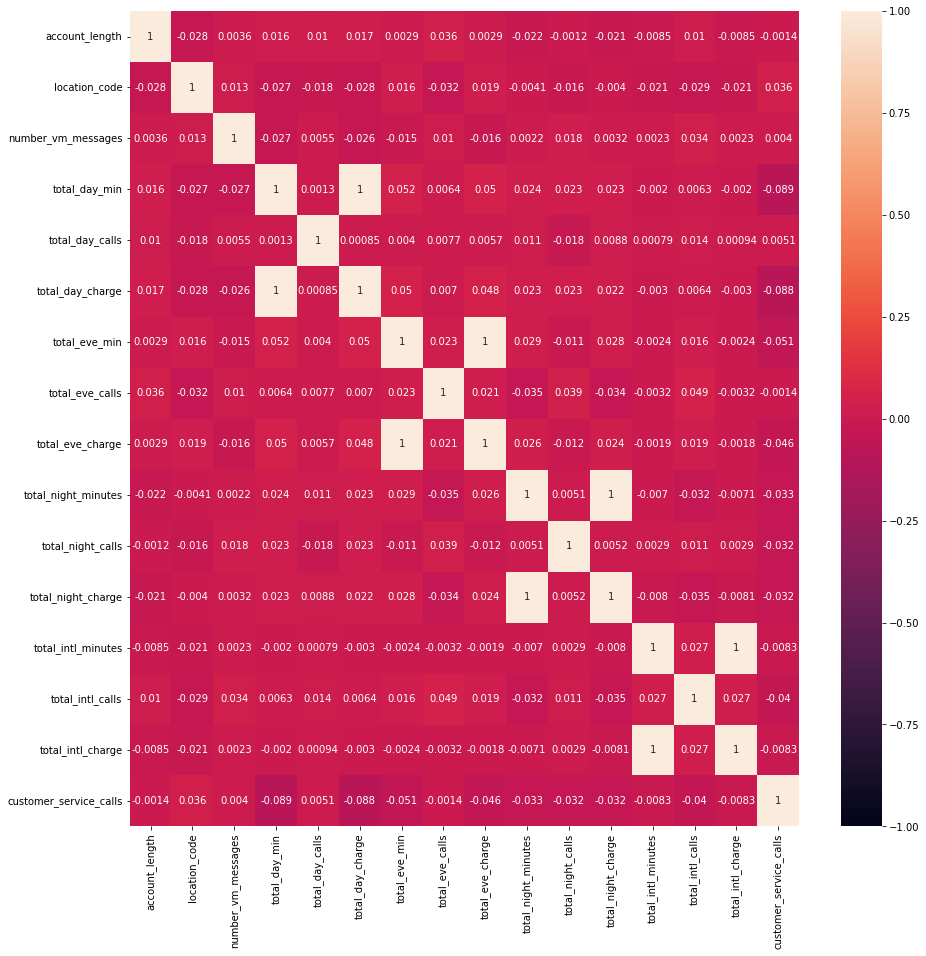

In [267]:
corr= df_train_4.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

In [ ]:
for feature in missing_columns:
    df[feature + '_imp'] = df[feature]
    df = random_imputation(df, feature)

In [210]:

def imputation(df,missing_columns):
    deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

    for feature in missing_columns:

        deter_data["Det" + feature] = df[feature + "_imp"]
        parameters = list(set(missing_columns) - set(feature))

        #Create a Linear Regression model to estimate the missing data
        model = LinearRegression()
        model.fit(X = df[parameters], y = df[feature ])

        #observe that I preserve the index of the missing data from the original dataframe
        deter_data.loc[df[feature].isnull(), "Det" + feature] = model.predict(df[parameters])[df[feature].isnull()]

    return deter_data

In [ ]:
df_train_5= df_train.copy()
df_train_5['total_day_charge'][]

In [211]:
missing_columns =['total_day_charge','total_day_min']
df_train_5= df_train.copy()
deter_data = imputation(df_train_5,missing_columns)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').